<a href="https://colab.research.google.com/github/tuba89/MachineLearning/blob/main/LogisticReression_TitanicPassenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
path = "/content/drive/MyDrive/titanic-passengers2.csv"

In [ ]:
df = pd.read_csv(path, sep=";")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S


In [ ]:
# remove cabin lots of null values and not important feature in our case
df.drop("Cabin", axis=1, inplace=True)

In [ ]:
# replace survived by 0 = no, 1 = yes
df["Survived"] = df["Survived"].map({"Yes":1, "No":0})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
# correcting the age
def impute_age(feature):
    Age = feature[0]
    Pclass = feature[1]
    if pd.isnull(Age):
        return int(df[df["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

In [ ]:
df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [ ]:
df['Age'] = df['Age'].astype(int)

In [ ]:
pd.get_dummies(df["Sex"])

,female,male
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
886,1,0
887,0,1
888,1,0
889,0,1


In [ ]:
# in male new feature, if its = 1 then is male, if 0 then is not male witch mean is female, 
# i drop one feature because it's crowded

In [ ]:
pd.get_dummies(df['Sex'], drop_first = True)
# if male = 1 (then he's male)
# if male = 0 (then she's female)

,male
0,1
1,1
2,1
3,0
4,1
...,...
886,0
887,1
888,0
889,1


In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')

In [ ]:
embarked_new = pd.get_dummies(df["Embarked"], drop_first=True)
sex_n = pd.get_dummies(df['Sex'], drop_first = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [ ]:
# add new "sex" and new "embarked" in df
df = pd.concat([df, sex_n, embarked_new], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  male         891 non-null    uint8  
 12  Q            891 non-null    uint8  
 13  S            891 non-null    uint8  
dtypes: float64(1), int64(6), object(4), uint8(3)
memory usage: 79.3+ KB


In [ ]:
# remove other useless features
df.drop(['PassengerId', 'Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 44.5 KB


In [ ]:
df.dropna(inplace= True)

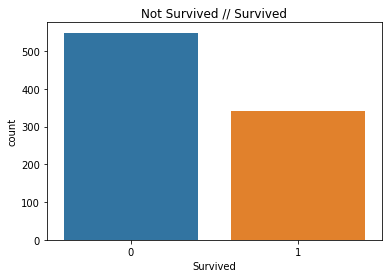

In [ ]:
sns.countplot(x='Survived',data=df)
plt.title('Not Survived // Survived')
plt.show()

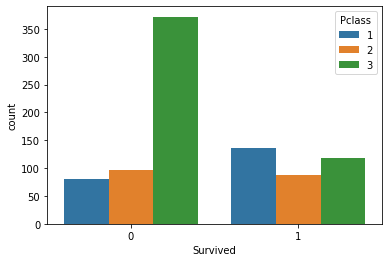

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=df)

# Building a Logistic Regression Model

In [ ]:
# spliting x = features & y = target
x = df.drop("Survived", axis=1)
y = df["Survived"]

#splitting data with test size of 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
#build our logistic model
logreg = LogisticRegression()

In [ ]:
# i do this because i had (ConvergenceWarning)

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [ ]:
#fitting training data  
logreg.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

* **Measuring the Performance of Logistic Regression**

---

---





In [ ]:
#testing model’s performance
y_pred  = logreg.predict(x_test)    
print("Accuracy = {:.2f}".format(logreg.score(x_test, y_test)))
print(f"the accuracy is {int(round(logreg.score(x_test, y_test) * 100))} %")

Accuracy = 0.81
the accuracy is 81 %


In [ ]:
# report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       132
           1       0.81      0.69      0.75        91

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223



* **Confusion matrix**

---

In [ ]:
confusion_matrix(y_test, y_pred)

array([[117,  15],
       [ 28,  63]])

- 00 = T+: True positive (117) here : the model predicted a positive result and it was positive) == > correct
- 01 = F+: False positive (15) here : the model predicted a positive result and it was negative)
- 10 = F-: False negative (28) here : the model predicted a negative result and it was positive)
- 11 = T-: True negative (63) here : the model predicted a negative result and it was negative) ==> correct

* **validation matrix for classification is ROC / AUC**

---

In [ ]:
#3. Another validation matrix for classification is ROC / AUC , 
# do your research on them explain them and apply them in our case, 


* ROC  = (Receiver Operating Characteristic curve)
* AUC = (the Area Under the ROC Curve)
* - **Definition**:
    - ROC / AUC help as to know how accurate our model is, if our model is good or bad
    - ==> The model performance is determined by looking at AUC. 
    - ==> The best possible AUC is 1 while the worst is 0.5 (Larger area is better model)
* - **Calculation**:
    - ROC : is a plot of signal (True Positive Rate) against noise (False Positive Rate).
    - - True Positive Rate (TPr) = TP / TP+FN
    - - False Positive Rate (FPr) = FP / FP+TN
* -  ***NOTE***:

    -> Any value less than 0.5 mean:
        - we can simply do the exact opposite of what the model recommends to get the value back above 0.5

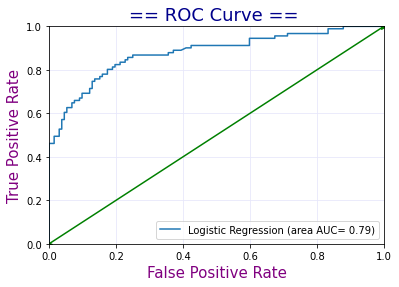

In [ ]:

#plotting roc and see auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area AUC= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g->')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', color="Purple", fontsize=15)
plt.ylabel('True Positive Rate', color="purple", fontsize=15)
plt.title('== ROC Curve == ', fontsize=18, color="Darkblue")
plt.legend(loc="lower right")

plt.grid(color="lavender")
plt.show()

* the model prediction is good because the area auc is large 0.79 close to 1